# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 6

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


Initializing Exclusion Zone Protocol...
Epoch 0: Train Loss 0.6932 | Val Accuracy 61.89%
Epoch 500: Train Loss 0.6575 | Val Accuracy 61.89%
Epoch 1000: Train Loss 0.4628 | Val Accuracy 78.78%
Epoch 1500: Train Loss 0.4148 | Val Accuracy 81.78%
Epoch 2000: Train Loss 0.3294 | Val Accuracy 86.00%
Epoch 2500: Train Loss 0.2979 | Val Accuracy 88.00%
Epoch 3000: Train Loss 0.2873 | Val Accuracy 88.67%
Epoch 3500: Train Loss 0.2812 | Val Accuracy 89.00%
Epoch 4000: Train Loss 0.2776 | Val Accuracy 89.56%
Epoch 4500: Train Loss 0.2743 | Val Accuracy 89.44%
Training Complete. Generating GDC Dashboard...


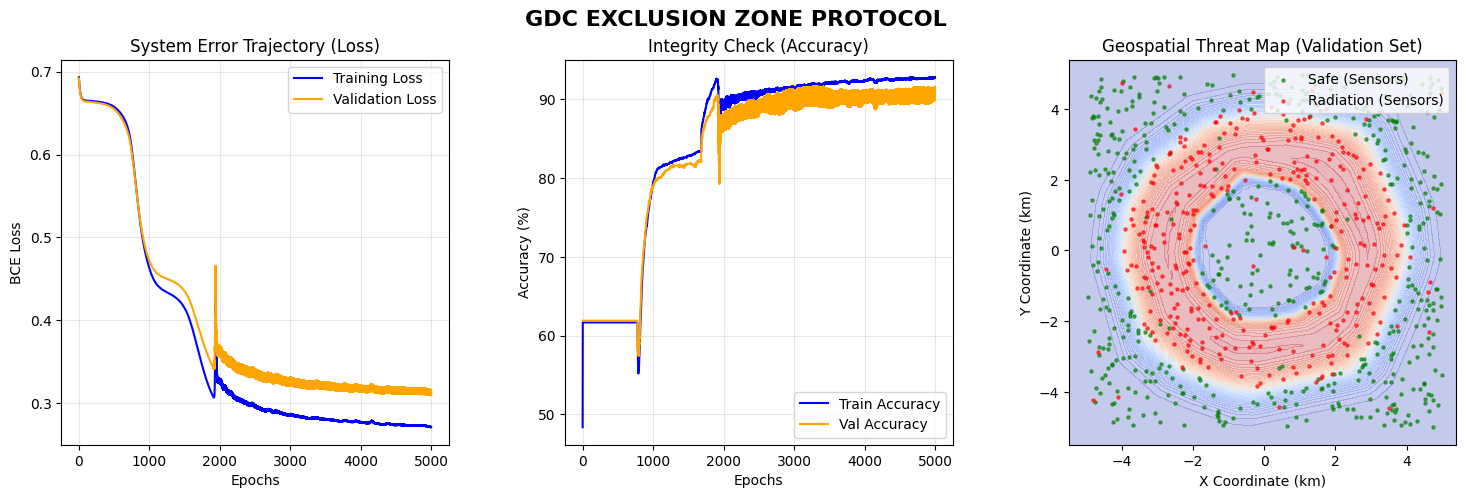

In [5]:
# ===========================================================
# PART 1.5: Manual Data Splitting (70% Train, 30% Validation)
# ===========================================================

# Shuffle indices to ensure random distribution
indices = torch.randperm(X_full.size(0))
split_idx = int(0.7 * X_full.size(0)) # 2100 for training, 900 for validation

# Slice the tensors based on indices
train_indices = indices[:split_idx]
val_indices = indices[split_idx:]

X_train, y_train = X_full[train_indices], y_full[train_indices]
X_val, y_val = X_full[val_indices], y_full[val_indices]

# ===========================================================
# PART 2: Architecture & Initialization (Manual Setup)
# ===========================================================

# Hyperparameters
input_dim = 2
hidden_dim = 16
output_dim = 1
learning_rate = 0.1
epochs = 5000

# Initialize Weights and Biases manually
def init_param(shape):
    weights = torch.randn(shape) * 0.1
    weights.requires_grad = True
    return weights

# Layer 1 (Input -> Hidden 1)
W1 = init_param((input_dim, hidden_dim))
b1 = torch.zeros(hidden_dim, requires_grad=True)

# Layer 2 (Hidden 1 -> Hidden 2)
W2 = init_param((hidden_dim, hidden_dim))
b2 = torch.zeros(hidden_dim, requires_grad=True)

# Layer 3 (Hidden 2 -> Hidden 3)
W3 = init_param((hidden_dim, hidden_dim))
b3 = torch.zeros(hidden_dim, requires_grad=True)

# Layer 4 (Hidden 3 -> Output)
W4 = init_param((hidden_dim, output_dim))
b4 = torch.zeros(output_dim, requires_grad=True)

params = [W1, b1, W2, b2, W3, b3, W4, b4]

# ===========================================================
# PART 3: Helper Functions (Manual math)
# ===========================================================

def manual_relu(x):
    """Rectified Linear Unit: max(0, x)"""
    return torch.max(torch.zeros_like(x), x)

def manual_sigmoid(x):
    """Sigmoid: 1 / (1 + e^-x)"""
    return 1 / (1 + torch.exp(-x))

def forward(X):
    """
    Forward pass through 3 hidden layers + 1 output layer
    """
    # Layer 1
    z1 = torch.matmul(X, W1) + b1
    a1 = manual_relu(z1)

    # Layer 2
    z2 = torch.matmul(a1, W2) + b2
    a2 = manual_relu(z2)

    # Layer 3
    z3 = torch.matmul(a2, W3) + b3
    a3 = manual_relu(z3)

    # Output Layer
    z4 = torch.matmul(a3, W4) + b4
    a4 = manual_sigmoid(z4)

    return a4

def manual_bce_loss(y_pred, y_true):
    """
    Binary Cross Entropy Loss manually implemented.
    Includes clamping to avoid log(0).
    """
    y_pred = torch.clamp(y_pred, min=1e-7, max=1 - 1e-7)
    loss = -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
    return torch.mean(loss)

def calculate_accuracy(y_pred, y_true):
    predicted_classes = (y_pred >= 0.5).float()
    correct_predictions = (predicted_classes == y_true).float().sum()
    return (correct_predictions / y_true.shape[0]) * 100

# ===========================================================
# PART 4: Training Loop (Manual Gradient Descent)
# ===========================================================

train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

print("Initializing Exclusion Zone Protocol...")

for epoch in range(epochs):
    # --- Forward Pass (Training) ---
    y_pred_train = forward(X_train)
    loss = manual_bce_loss(y_pred_train, y_train)

    # --- Backward Pass (Autograd) ---
    loss.backward()

    # --- Manual Optimization (SGD) ---
    with torch.no_grad():
        for param in params:
            param -= learning_rate * param.grad # Update weights
            param.grad.zero_() # Reset gradients

    # --- Validation Check ---
    with torch.no_grad():
        y_pred_val = forward(X_val)
        val_loss = manual_bce_loss(y_pred_val, y_val)

        train_acc = calculate_accuracy(y_pred_train, y_train)
        val_acc = calculate_accuracy(y_pred_val, y_val)

    # --- Record Telemetry ---
    train_loss_history.append(loss.item())
    val_loss_history.append(val_loss.item())
    train_acc_history.append(train_acc.item())
    val_acc_history.append(val_acc.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Train Loss {loss.item():.4f} | Val Accuracy {val_acc.item():.2f}%")

print("Training Complete. Generating GDC Dashboard...")

# ===========================================================
# PART 5: The GDC Dashboard (Visualization)
# ===========================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.subplots_adjust(wspace=0.3)

# Panel 1: System Error Trajectory (Loss)
axes[0].plot(train_loss_history, label='Training Loss', color='blue')
axes[0].plot(val_loss_history, label='Validation Loss', color='orange')
axes[0].set_title('System Error Trajectory (Loss)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('BCE Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel 2: Integrity Check (Accuracy)
axes[1].plot(train_acc_history, label='Train Accuracy', color='blue')
axes[1].plot(val_acc_history, label='Val Accuracy', color='orange')
axes[1].set_title('Integrity Check (Accuracy)')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy (%)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Panel 3: Geospatial Threat Map (Decision Boundary)
axes[2].set_title('Geospatial Threat Map (Validation Set)')
axes[2].set_xlabel('X Coordinate (km)')
axes[2].set_ylabel('Y Coordinate (km)')

# Meshgrid for visualization
x_min, x_max = -5.5, 5.5
y_min, y_max = -5.5, 5.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

mesh_data = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    Z = forward(mesh_data).numpy()
Z = Z.reshape(xx.shape)

# Draw Decision Boundary
contour = axes[2].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=50)

# Overlay Validation Data
safe_indices = (y_val == 0).squeeze()
danger_indices = (y_val == 1).squeeze()

axes[2].scatter(X_val[safe_indices, 0], X_val[safe_indices, 1],
                c='green', s=5, alpha=0.6, label='Safe (Sensors)')
axes[2].scatter(X_val[danger_indices, 0], X_val[danger_indices, 1],
                c='red', s=5, alpha=0.6, label='Radiation (Sensors)')
axes[2].legend(loc='upper right')

plt.suptitle('GDC EXCLUSION ZONE PROTOCOL', fontsize=16, weight='bold')
plt.show()